In [1]:
import pandas as pd
import joblib
from sklearn.dummy import DummyRegressor
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import learning_curve

In [3]:
data = pd.read_csv("../data/raw/Ecommerce_Sales_Prediction_Dataset.csv")

In [5]:
data.head()

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold
0,01-01-2023,Sports,932.80,35.82,Occasional,6780.38,32
1,02-01-2023,Toys,569.48,3.60,Premium,6807.56,16
2,03-01-2023,Home Decor,699.68,3.56,Premium,3793.91,27
3,04-01-2023,Toys,923.27,0.61,Premium,9422.75,29
4,05-01-2023,Toys,710.17,47.83,Premium,1756.83,17


In [7]:
X_train = joblib.load("../data/processed/X_train.joblib")
y_train = joblib.load("../data/processed/y_train.joblib")
X_test = joblib.load("../data/processed/X_test.joblib")
y_test = joblib.load("../data/processed/y_test.joblib")
scaler = joblib.load("../data/processed/scaler.joblib")

In [9]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(800, 14)
(800,)
(200, 14)
(200,)


In [11]:
X_train.dtypes

Price                           float64
Discount                        float64
Marketing_Spend                 float64
month                           float64
day                             float64
weekday                         float64
Product_Category_Electronics      int64
Product_Category_Fashion          int64
Product_Category_Home Decor       int64
Product_Category_Sports           int64
Product_Category_Toys             int64
Customer_Segment_Occasional       int64
Customer_Segment_Premium          int64
Customer_Segment_Regular          int64
dtype: object

In [13]:
X_test.dtypes

Price                           float64
Discount                        float64
Marketing_Spend                 float64
month                           float64
day                             float64
weekday                         float64
Product_Category_Electronics      int64
Product_Category_Fashion          int64
Product_Category_Home Decor       int64
Product_Category_Sports           int64
Product_Category_Toys             int64
Customer_Segment_Occasional       int64
Customer_Segment_Premium          int64
Customer_Segment_Regular          int64
dtype: object

In [15]:
#Calculate the mean of `y_train`
train_mean = y_train.mean()
train_mean

np.float64(29.645)

In [17]:
#Fit the dummy regressor on the training data
#Hint, call its `.fit()` method with `X_train` and `y_train` as arguments
#Then print the object's `constant_` attribute and verify it's the same as the mean above
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
dumb_reg.constant_

array([[29.645]])

In [19]:
#Calculate the R^2 
def r_squared(y, ypred):
    """R-squared score.
    
    Calculate the R-squared, or coefficient of determination, of the input.
    
    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    ybar = np.sum(y) / len(y) #yes, we could use np.mean(y)
    sum_sq_tot = np.sum((y - ybar)**2) #total sum of squares error
    sum_sq_res = np.sum((y - ypred)**2) #residual sum of squares error
    R2 = 1.0 - sum_sq_res / sum_sq_tot
    return R2

In [21]:
y_tr_pred_ = train_mean * np.ones(len(y_train))
y_tr_pred_[:5]

array([29.645, 29.645, 29.645, 29.645, 29.645])

In [23]:
y_tr_pred = dumb_reg.predict(X_train)
y_tr_pred[:5]

array([29.645, 29.645, 29.645, 29.645, 29.645])

In [25]:
r_squared(y_train, y_tr_pred)

np.float64(0.0)

In [27]:
y_te_pred = train_mean * np.ones(len(y_test))
r_squared(y_test, y_te_pred)

np.float64(-0.00011069850189904251)

In [29]:
#Calculate the MAE
def mae(y, ypred):
    """Mean absolute error.
    
    Calculate the mean absolute error of the arguments

    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    abs_error = np.abs(y - ypred)
    mae = np.mean(abs_error)
    return mae

In [31]:
mae(y_train, y_tr_pred)

np.float64(5.9144375)

In [33]:
mae(y_test, y_te_pred)

np.float64(5.51145)

In [35]:
#Calculate the MSE 
def mse(y, ypred):
    """Mean square error.
    
    Calculate the mean square error of the arguments

    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    sq_error = (y - ypred)**2
    mse = np.mean(sq_error)
    return mse

In [37]:
mse(y_train, y_tr_pred)

np.float64(54.896475)

In [39]:
mse(y_test, y_te_pred)

np.float64(44.269275)

In [41]:
np.sqrt([mse(y_train, y_tr_pred), mse(y_test, y_te_pred)])

array([7.40921555, 6.65351599])

In [43]:
#Using metrics from sklearn.metrics instead of defining functions for metrics as above
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.0, -0.00011069850189904251)

In [45]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(5.9144375, 5.51145)

In [47]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(54.896475, 44.269275)

In [49]:
lm = LinearRegression().fit(X_train, y_train)

In [51]:
#Call the `predict()` method of the model (`lm`) on both the train and test data
#Assign the predictions to `y_tr_pred` and `y_te_pred`, respectively
y_tr_pred = lm.predict(X_train)
y_te_pred = lm.predict(X_test)

In [53]:
# r^2 - train, test
median_r2 = r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)
median_r2

(0.01819254438901785, -0.025101544266194376)

In [55]:
median_mae = mae(y_train, y_tr_pred), mae(y_test, y_te_pred)
median_mae

(np.float64(5.835188404324298), np.float64(5.566895559665421))

In [57]:
median_mse = mse(y_train, y_tr_pred), mae(y_test, y_te_pred)
median_mse

(np.float64(53.89776844176189), np.float64(5.566895559665421))

In [59]:
pipe = make_pipeline(
    SelectKBest(f_regression),
    LinearRegression()
)

In [61]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'transform_input', 'verbose', 'selectkbest', 'linearregression', 'selectkbest__k', 'selectkbest__score_func', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__positive'])

In [63]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}

In [65]:
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [67]:
lr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x12daa45e0>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14]})

In [68]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [69]:
#Print the `best_params_` attribute of `lr_grid_cv`
lr_grid_cv.best_params_

{'selectkbest__k': 4}

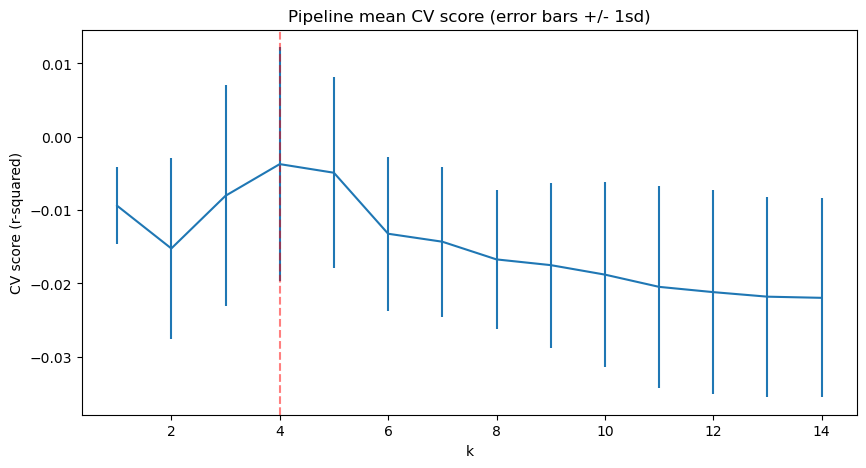

In [73]:
#Assign the value of k from the above dict of `best_params_` and assign it to `best_k`
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

In [75]:
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()

In [77]:
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(coefs, index=features).sort_values(ascending=False)

Customer_Segment_Premium       0.922627
month                          0.521441
weekday                       -0.420310
Customer_Segment_Occasional   -0.556741
dtype: float64

In [79]:
RF_pipe = make_pipeline(
    RandomForestRegressor(random_state=47)
)

In [81]:
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=5)

In [83]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([-0.13331852, -0.14679005, -0.04973518, -0.10726237, -0.06348749])

In [85]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)


(np.float64(-0.1001187218606013), np.float64(0.03797846704717983))

In [87]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestregressor__n_estimators': n_est }
grid_params

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000]}

In [89]:
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [93]:
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000]})

In [95]:
rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 1000}

In [97]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([-0.09334881, -0.12591274, -0.05278199, -0.09596631, -0.04940255])

In [99]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(np.float64(-0.08348247957801233), np.float64(0.028835668330096733))

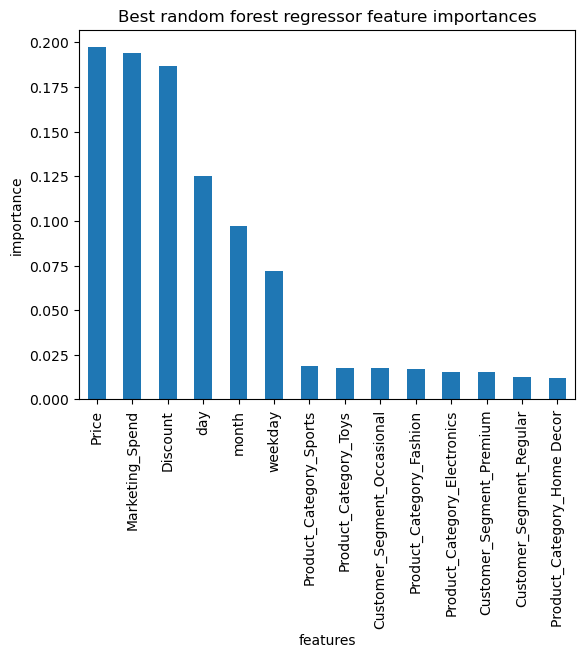

In [101]:
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

In [103]:
# 'neg_mean_absolute_error' uses the (negative of) the mean absolute error
lr_neg_mae = cross_validate(lr_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [105]:
lr_mae_mean = np.mean(-1 * lr_neg_mae['test_score'])
lr_mae_std = np.std(-1 * lr_neg_mae['test_score'])
lr_mae_mean, lr_mae_std

(np.float64(5.900367461859611), np.float64(0.16821732241015205))

In [107]:
mean_absolute_error(y_test, lr_grid_cv.best_estimator_.predict(X_test))

5.553284780003903

In [109]:
rf_neg_mae = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [110]:
rf_mae_mean = np.mean(-1 * rf_neg_mae['test_score'])
rf_mae_std = np.std(-1 * rf_neg_mae['test_score'])
rf_mae_mean, rf_mae_std

(np.float64(6.120010000000001), np.float64(0.18091090251833894))

In [111]:
mean_absolute_error(y_test, rf_grid_cv.best_estimator_.predict(X_test))

5.516315

In [115]:
fractions = [.2, .25, .3, .35, .4, .45, .5, .6, .75, .8, 1.0]
train_size, train_scores, test_scores = learning_curve(pipe, X_train, y_train, train_sizes=fractions)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

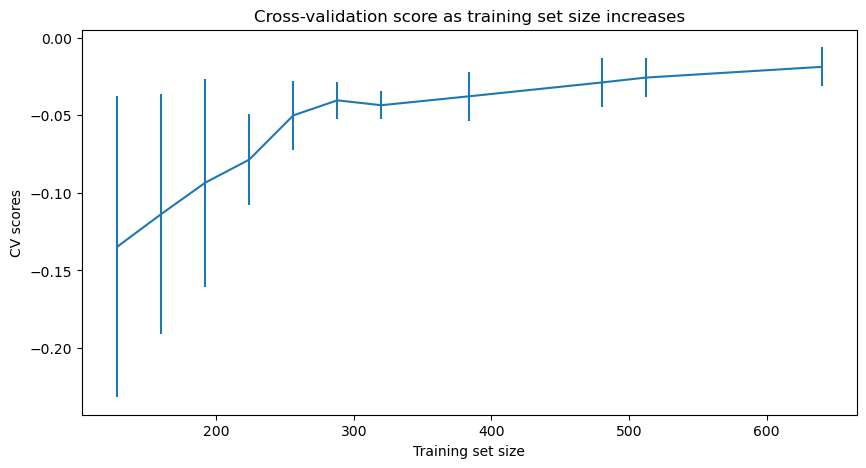

In [117]:
plt.subplots(figsize=(10, 5))
plt.errorbar(train_size, test_scores_mean, yerr=test_scores_std)
plt.xlabel('Training set size')
plt.ylabel('CV scores')
plt.title('Cross-validation score as training set size increases');